In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns

import librosa
import librosa.display


In [2]:
JSON_DIR = "data/wav-splits"

EXP_DIR = "exp/exp1"


In [3]:
json_paths = list(Path(JSON_DIR).glob("*.json"))
json_paths = [str(p) for p in json_paths]
json_paths.sort()
json_paths

['data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.json',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.1.json',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.2.json',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.3.json',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.json',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.5.json',
 'data/wav-splits/10.古市小学校前.mono.0.json',
 'data/wav-splits/10.古市小学校前.mono.1.json',
 'data/wav-splits/10.古市小学校前.mono.2.json',
 'data/wav-splits/10.古市小学校前.mono.3.json',
 'data/wav-splits/10.古市小学校前.mono.4.json',
 'data/wav-splits/10.古市小学校前.mono.5.json',
 'data/wav-splits/11.東大通パーク.mono.0.json',
 'data/wav-splits/11.東大通パーク.mono.1.json',
 'data/wav-splits/11.東大通パーク.mono.2.json',
 'data/wav-splits/11.東大通パーク.mono.3.json',
 'data/wav-splits/11.東大通パーク.mono.4.json',
 'data/wav-splits/11.東大通パーク.mono.5.json',
 'data/wav-splits/12.東大通パーク2.mono.0.json',
 'data/wav-splits/12.東大通パーク2.mono.1.json',
 'data/wav-splits/12.東大通パーク2.mono.2.json'

In [4]:
import json
def load_f_json(json_path):
    with open(json_path, mode='rt', encoding='utf-8') as fp:
        data = json.load(fp)
    return data

load_f_json(json_paths[0])

{'wav_path': 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.wav',
 'loudness': 4.565387384473564,
 'sharpness': 1.0940113929801556,
 'roughness': 0.017140287110175716}

In [5]:
buf = []
for json_path in json_paths:
    data = load_f_json(json_path)
    buf.append(data)
    
    

In [6]:
df_data = pd.DataFrame(buf)

df_data["wav_name"] = df_data["wav_path"].apply(lambda x: Path(x).name)
df_data["wav_no"] = df_data["wav_name"].apply(lambda x: x.split(".")[0]).astype(int)
df_data["wav_sub_no"] = df_data["wav_name"].apply(lambda x: x.split(".")[-2]).astype(int)
df_data["wav_group_name"] = df_data["wav_name"].apply(lambda x: x.split(".")[1][:15])
df_data = df_data.sort_values(["wav_no", "wav_sub_no"])

df_data.to_csv(Path(EXP_DIR) / "df_data.csv", index=None)
df_data

,wav_path,loudness,sharpness,roughness,wav_name,wav_no,wav_sub_no,wav_group_name
0,data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mo...,4.565387,1.094011,0.017140,1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.wav,1,0,バスタ新宿 4f 高速バス
1,data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mo...,3.976552,1.045894,0.016271,1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.1.wav,1,1,バスタ新宿 4f 高速バス
2,data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mo...,3.096867,0.980166,0.012509,1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.2.wav,1,2,バスタ新宿 4f 高速バス
3,data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mo...,3.073020,0.945393,0.012480,1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.3.wav,1,3,バスタ新宿 4f 高速バス
4,data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mo...,3.102092,0.971888,0.011784,1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav,1,4,バスタ新宿 4f 高速バス
...,...,...,...,...,...,...,...,...
55,data/wav-splits/18.渋谷センター街.mono.1.wav,15.264446,1.191552,0.047794,18.渋谷センター街.mono.1.wav,18,1,渋谷センター街
56,data/wav-splits/18.渋谷センター街.mono.2.wav,15.271418,1.188067,0.042762,18.渋谷センター街.mono.2.wav,18,2,渋谷センター街
57,data/wav-splits/18.渋谷センター街.mono.3.wav,15.426600,1.190434,0.037305,18.渋谷センター街.mono.3.wav,18,3,渋谷センター街
58,data/wav-splits/18.渋谷センター街.mono.4.wav,15.039718,1.160534,0.042647,18.渋谷センター街.mono.4.wav,18,4,渋谷センター街


In [7]:
df_data.columns

Index(['wav_path', 'loudness', 'sharpness', 'roughness', 'wav_name', 'wav_no',
       'wav_sub_no', 'wav_group_name'],
      dtype='object')

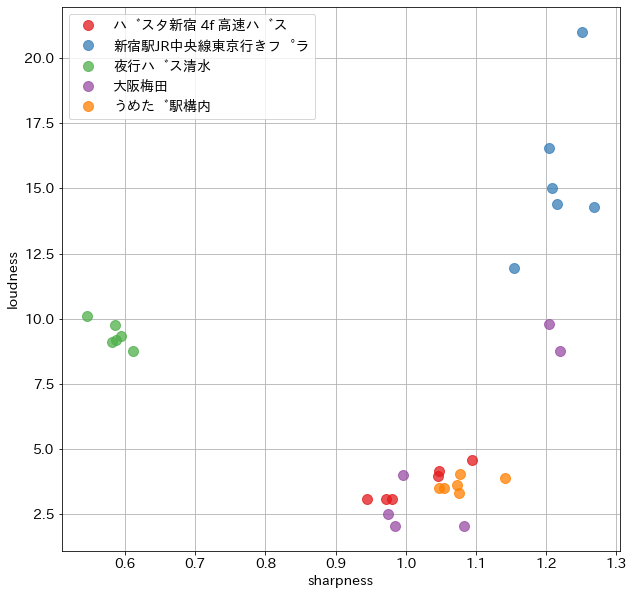

In [13]:
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

y_feature = "loudness"
x_feature = "sharpness"
cat_feature = "wav_group_name"

plt.rcParams["font.size"] = 14


dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:5]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)
    plt.legend()
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



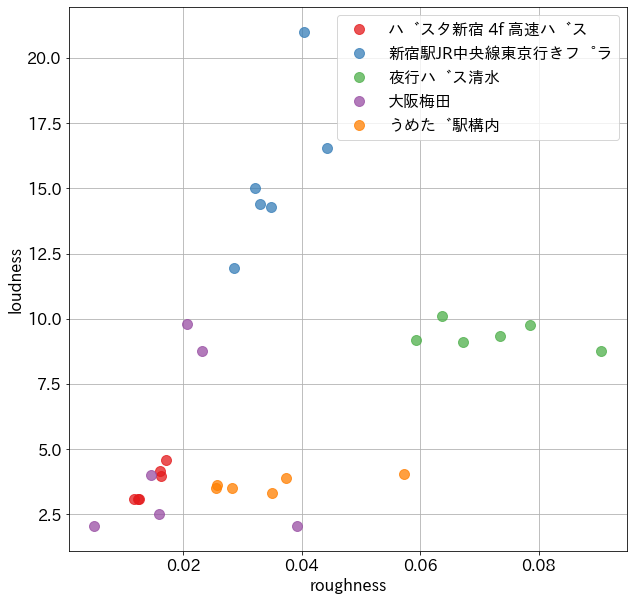

In [14]:
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

y_feature = "loudness"
x_feature = "roughness"
cat_feature = "wav_group_name"

plt.rcParams["font.size"] = 16

dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:5]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)

    plt.legend()
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()
plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")